Author: Jesus Ugarte
University of Central Florida
Algorithms for Machine Learning
Tumor Prediction

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn import naive_bayes 

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING DATA
train_data = pd.read_csv('/content/drive/MyDrive/Assignment 3 -ML/train.csv').drop(columns=['id'])
sample_data = pd.read_csv('/content/drive/MyDrive/Assignment 3 -ML/sample_submission.csv').drop(columns=['id'])
test_data = pd.read_csv('/content/drive/MyDrive/Assignment 3 -ML/test.csv').drop(columns=['id'])
train_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.48,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.04938,0.2075,0.05636,0.4204,2.2200,3.301,38.87,0.009369,0.029830,0.05371,0.017610,0.02418,0.003249,16.21,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846,1
1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.03221,0.1687,0.05669,0.2446,0.4334,1.826,23.31,0.003271,0.017700,0.02310,0.008399,0.01148,0.002379,17.18,18.22,112.00,906.6,0.1065,0.27910,0.31510,0.11470,0.2688,0.08273,0
2,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,0.2889,0.9899,1.778,21.79,0.008534,0.006364,0.00618,0.007408,0.01065,0.003351,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319,0
3,13.20,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.01105,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.015690,0.03079,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.1101,0.15080,0.22980,0.04970,0.2767,0.07198,0
4,12.47,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.02369,0.1526,0.06046,0.1532,0.7810,1.253,11.91,0.003796,0.013710,0.01346,0.007096,0.01536,0.001541,14.06,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,15.13,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.02739,0.1852,0.05294,0.4681,1.6270,3.043,45.38,0.006831,0.014270,0.02489,0.009087,0.03151,0.001750,17.26,36.91,110.10,931.4,0.1148,0.09866,0.15470,0.06575,0.3233,0.06165,1
280,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.336800,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.042430,0.04266,0.015080,0.02335,0.003385,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.64510,0.27560,0.3690,0.08815,1
281,12.04,28.14,76.85,449.9,0.08752,0.06000,0.023670,0.02377,0.1854,0.05698,0.6061,2.6430,4.099,44.96,0.007517,0.015550,0.01465,0.011830,0.02047,0.003883,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639,0
282,11.27,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.02757,0.1810,0.07252,0.3305,1.0670,2.569,22.97,0.010380,0.066690,0.09472,0.020470,0.01219,0.012330,12.04,18.93,79.73,450.0,0.1102,0.28090,0.30210,0.08272,0.2157,0.10430,0


In [ ]:
#Taking a look at the sample data 
sample_data

,diagnosis
0,1
1,1
2,0
3,1
4,1
...,...
280,0
281,0
282,1
283,0


In [ ]:
#GET DATA INFO
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              284 non-null    float64
 1   texture_mean             284 non-null    float64
 2   perimeter_mean           284 non-null    float64
 3   area_mean                284 non-null    float64
 4   smoothness_mean          284 non-null    float64
 5   compactness_mean         284 non-null    float64
 6   concavity_mean           284 non-null    float64
 7   concave points_mean      284 non-null    float64
 8   symmetry_mean            284 non-null    float64
 9   fractal_dimension_mean   284 non-null    float64
 10  radius_se                284 non-null    float64
 11  texture_se               284 non-null    float64
 12  perimeter_se             284 non-null    float64
 13  area_se                  284 non-null    float64
 14  smoothness_se            2

CHECKING FOR MISSING VALUES

In [ ]:
# Checking Nan presence
train_data.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
diagnosis 

THERE ARE NO MISSING VALUES !!

In [ ]:
# Computing the descriptive statistics of our numrerical features
train_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,284.000000,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,14.133384,19.354824,91.96331,656.370423,0.095307,0.102288,0.088245,0.047708,0.180214,0.062251,0.395850,1.221463,2.799136,38.974380,0.007036,0.025967,0.033004,0.011738,0.020623,0.003875,16.248229,25.865739,107.215493,880.827817,0.130850,0.252964,0.276384,0.113469,0.288513,0.083050,0.373239
std,3.557272,4.308783,24.44977,353.886842,0.014372,0.050656,0.079657,0.038772,0.026448,0.007089,0.237095,0.534399,1.676412,36.551638,0.003142,0.018662,0.035852,0.006575,0.008063,0.003137,4.883497,6.152410,34.022758,580.281025,0.022626,0.159129,0.217757,0.066945,0.058428,0.018022,0.484519
min,6.981000,9.710000,43.79000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.406400,0.771400,6.802000,0.002838,0.002252,0.000000,0.000000,0.010290,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.807500,16.060000,76.09750,428.675000,0.084668,0.062740,0.029640,0.019603,0.161775,0.057068,0.236450,0.856775,1.667000,17.967500,0.005298,0.012828,0.015030,0.007482,0.015017,0.002225,12.977500,21.382500,83.722500,512.450000,0.114300,0.145325,0.118475,0.062563,0.250300,0.071145,0.000000
50%,13.205000,18.945000,85.25000,540.250000,0.094155,0.093435,0.061745,0.033025,0.178300,0.061115,0.327500,1.094000,2.330000,24.950000,0.006302,0.020625,0.026245,0.010850,0.019030,0.003044,14.995000,25.580000,97.665000,683.600000,0.129450,0.211600,0.229800,0.097355,0.280950,0.078650,0.000000
75%,16.132500,21.825000,106.45000,799.100000,0.104825,0.127975,0.127700,0.070468,0.194425,0.065410,0.476050,1.478500,3.274000,44.467500,0.007989,0.033247,0.040697,0.014672,0.024202,0.004328,18.247500,30.127500,124.475000,1031.250000,0.144550,0.321725,0.386550,0.162925,0.311575,0.091482,1.000000
max,27.220000,32.470000,182.10000,2250.000000,0.163400,0.286700,0.426800,0.201200,0.274300,0.095020,1.509000,3.896000,9.807000,233.000000,0.031130,0.106400,0.396000,0.052790,0.061460,0.029840,33.130000,47.160000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.286700,0.577400,0.207500,1.000000


At this point, I already know that all values for diagnosis are integers that are either 0 or 1. Next nstep, I would like to see the graph distribution for the following dataset

(Text(0.5, 1.0, 'diagnosis of M and B'),
 Text(0.5, 0, 'diagnosis'),
 Text(0, 0.5, 'count'))

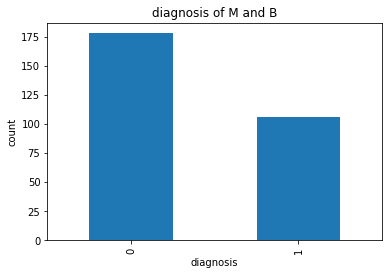

In [ ]:
#TAKING A LOOK AT THE DATA DISTRIBUTION
count = train_data.diagnosis.value_counts()
count.plot.bar()
plt.title('diagnosis of M and B'),plt.xlabel('diagnosis'),plt.ylabel('count')

CHECKING FOR OUTLIERS

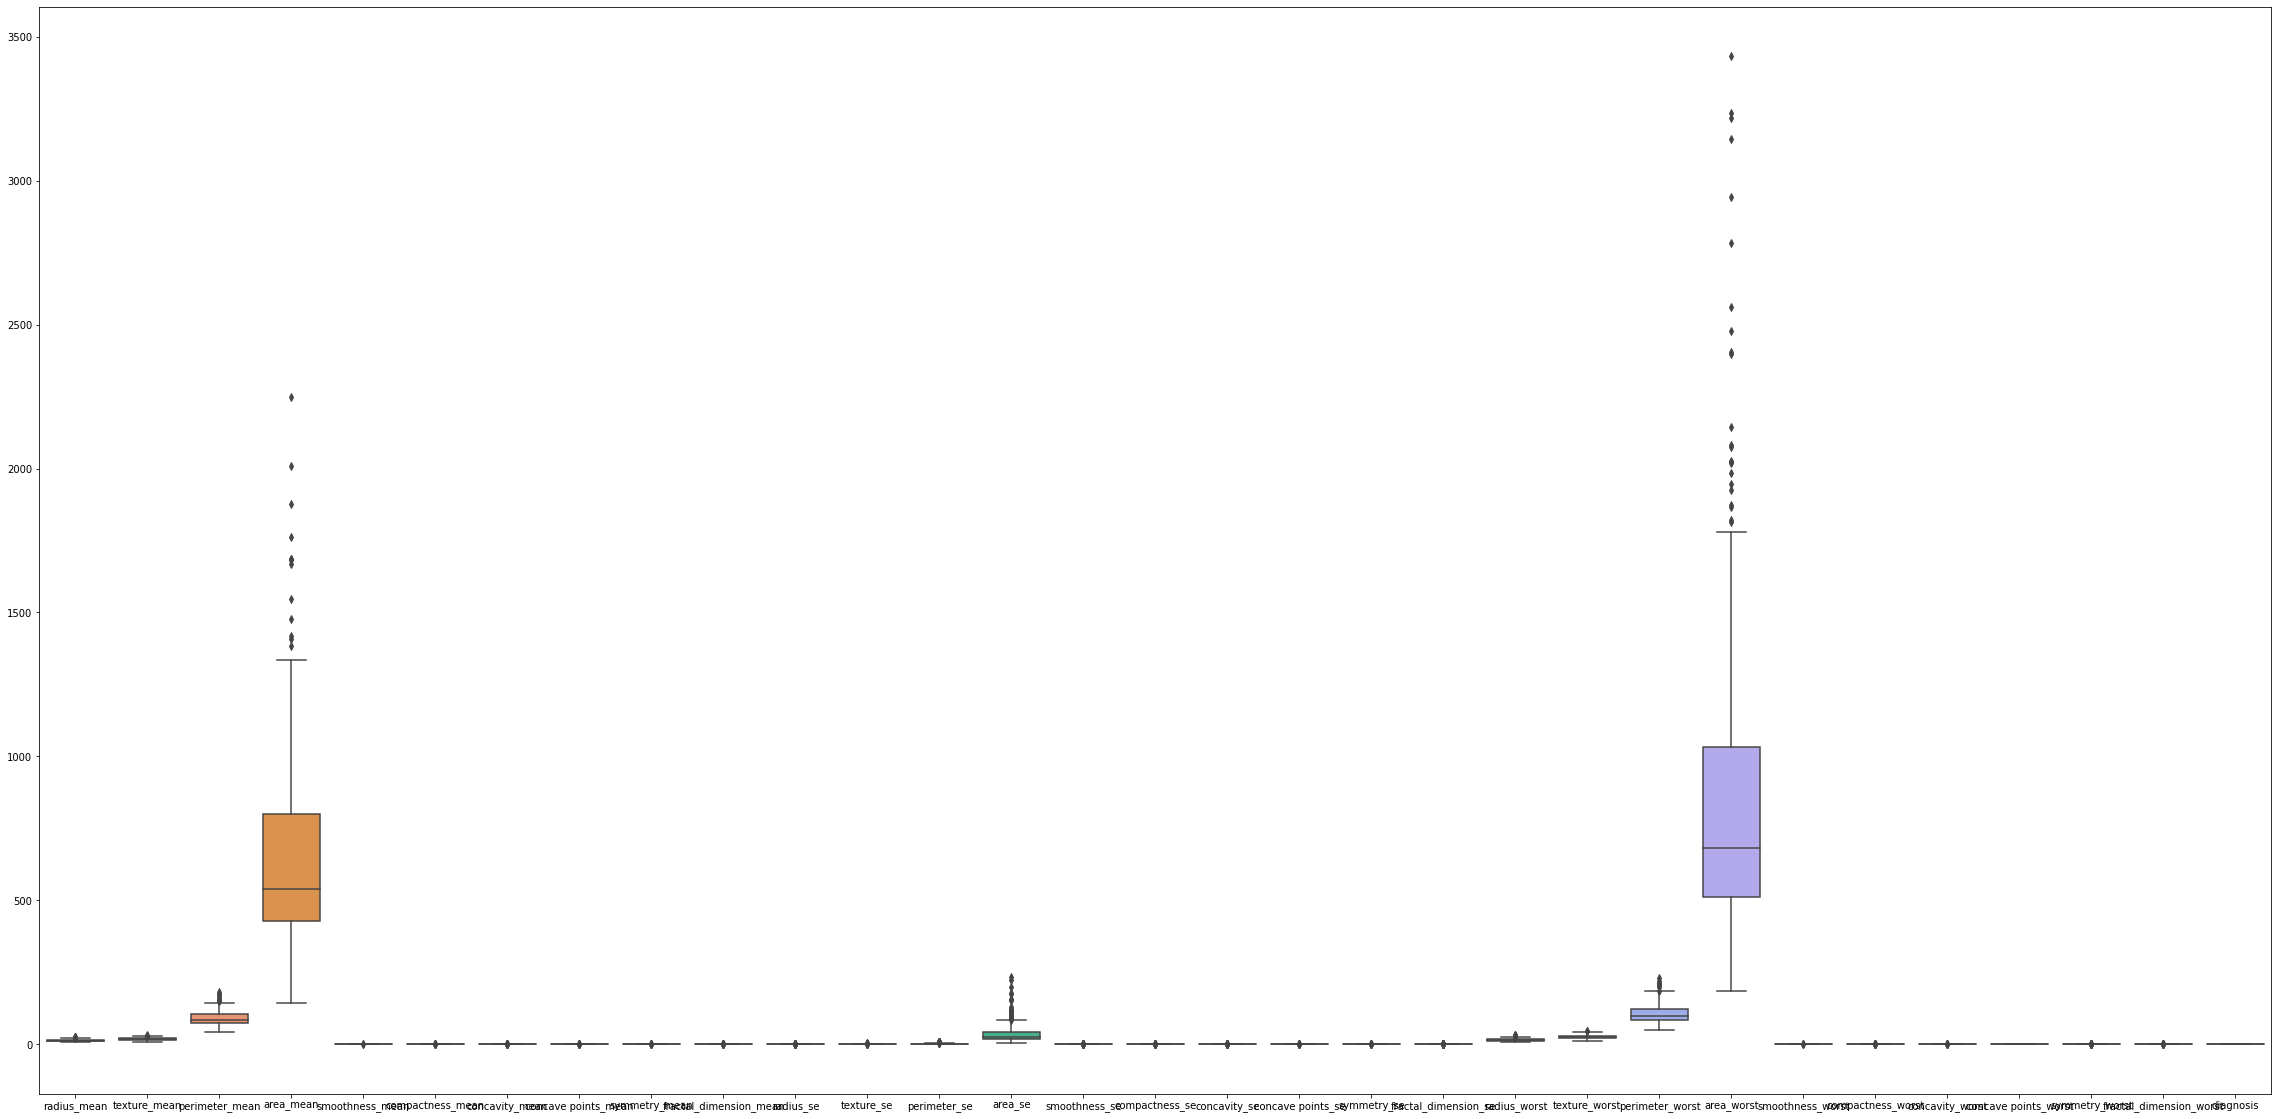

In [ ]:
plt.figure(figsize=(40,20))
sns.boxplot(data=train_data)

There are outliers but for now I will NOT do any manipulation on this data!!

In [ ]:
q1=train_data.quantile(0.25)
q2=train_data.quantile(0.72)
IQR=q2-q1
#train_data = train_data[~((train_data < (q1 - 1.5 * IQR)) |(train_data > (q2 + 1.5 * IQR))).any(axis=1)]
print(IQR)

radius_mean                  3.473300
texture_mean                 5.502800
perimeter_mean              25.774500
area_mean                  290.201000
smoothness_mean              0.018108
compactness_mean             0.058844
concavity_mean               0.084500
concave points_mean          0.046037
symmetry_mean                0.030901
fractal_dimension_mean       0.007561
radius_se                    0.208354
texture_se                   0.565385
perimeter_se                 1.490960
area_se                     21.842500
smoothness_se                0.002478
compactness_se               0.018308
concavity_se                 0.023888
concave points_se            0.006726
symmetry_se                  0.007712
fractal_dimension_se         0.001871
radius_worst                 4.405300
texture_worst                7.705900
perimeter_worst             32.709500
area_worst                 417.438000
smoothness_worst             0.028328
compactness_worst            0.159575
concavity_wo

In [ ]:
#Shuffling Data
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.45,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.059800,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.020000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.15520,0.4056,0.4967,0.18380,0.4753,0.10130,1
1,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,0.1903,0.5735,1.204,15.50,0.003632,0.007861,0.001128,0.002386,0.01344,0.002585,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385,0
2,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,0.6362,1.3050,4.312,76.36,0.005530,0.052960,0.061100,0.014440,0.02140,0.005036,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558,1
3,16.25,19.51,109.80,815.8,0.10260,0.18930,0.223600,0.091940,0.2151,0.06578,0.3147,0.9857,3.070,33.12,0.009197,0.054700,0.080790,0.022150,0.02773,0.006355,17.39,23.05,122.10,939.7,0.13770,0.4462,0.5897,0.17750,0.3318,0.09136,1
4,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,0.3971,0.8282,3.088,40.73,0.006090,0.025690,0.027130,0.013450,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.13810,0.3420,0.3508,0.19390,0.2928,0.07867,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,14.95,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,0.1744,0.06493,0.4220,1.9090,3.271,39.43,0.005790,0.048770,0.053030,0.015270,0.03356,0.009368,16.25,25.47,107.10,809.7,0.09970,0.2521,0.2500,0.08405,0.2852,0.09218,0
280,11.27,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.027570,0.1810,0.07252,0.3305,1.0670,2.569,22.97,0.010380,0.066690,0.094720,0.020470,0.01219,0.012330,12.04,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430,0
281,13.98,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,0.1669,0.06544,0.2208,0.9533,1.602,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.04,30.80,113.90,869.3,0.16130,0.3568,0.4069,0.18270,0.3179,0.10550,1
282,12.83,15.73,82.89,506.9,0.09040,0.08269,0.058350,0.030780,0.1705,0.05913,0.1499,0.4875,1.195,11.64,0.004873,0.017960,0.033180,0.008360,0.01601,0.002289,14.09,19.35,93.22,605.8,0.13260,0.2610,0.3476,0.09783,0.3006,0.07802,0


DATA PREPARATION

In [ ]:
#DATA PREPARATION
x_data = train_data.drop(["diagnosis"],axis=1)
x = x_data
y = train_data['diagnosis'].values

Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms.


There are three types of Naive Bayes models: Gaussian, Multinomial, and Bernoulli.

Since , Naive Bayes classifier takes care of data, I will not do any scale. Also, I will start by implementing Gaussian and Multinominal since the likelyhood of the features is assumend to be Gaussian.

BEST F1 pipeline 1.0


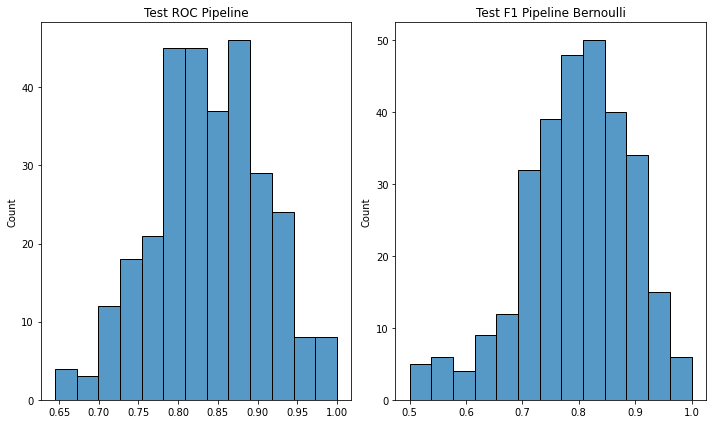

In [ ]:
#PIPELINE DEFAULT DISTRIBUTION MODEL
test_roc = []
test_f1= []
best_f1 = 0

for j in range(300):
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1)

  pipe = make_pipeline(naive_bayes.MultinomialNB())
  pipe = pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)

  test_roc.append(roc_auc_score(y_test, y_pred))
  test_f1.append(f1_score(y_test, y_pred.round()))

  if(best_f1 < f1_score(y_test, y_pred.round())):
    best_f1 = f1_score(y_test, y_pred.round())
    Best_pipe = pipe

f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].set_title("Test ROC Pipeline")
axs[1].set_title("Test F1 Pipeline Bernoulli")
sns.histplot(test_roc, ax = axs[0])
sns.histplot(test_f1, ax = axs[1])
f.tight_layout()
print("BEST F1 pipeline", best_f1)

Gaussian Naive Bayes – This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed. 

BEST F1 pipeline 1.0


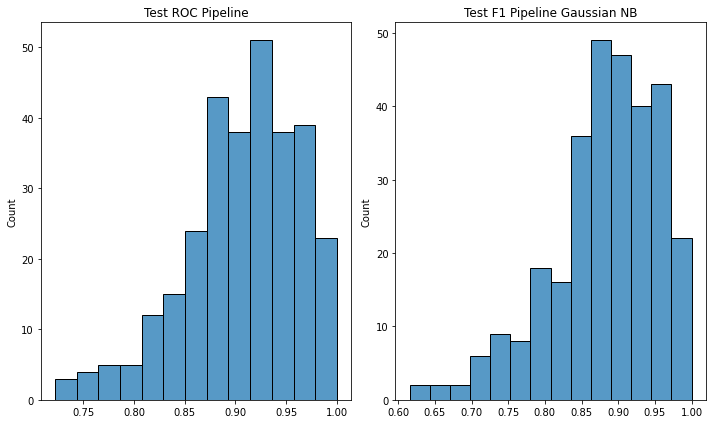

In [ ]:
#PIPELINE DEFAULT DISTRIBUTION MODEL
test_roc = []
test_f1= []
best_f1 = 0

for j in range(300):
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1)

  pipe = make_pipeline(naive_bayes.GaussianNB())
  pipe = pipe.fit(x_train, y_train)
  y_pred = pipe.predict(x_test)

  test_roc.append(roc_auc_score(y_test, y_pred))
  test_f1.append(f1_score(y_test, y_pred.round()))

  if(best_f1 < f1_score(y_test, y_pred.round())):
    best_f1 = f1_score(y_test, y_pred.round())
    Best_pipe = pipe

f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].set_title("Test ROC Pipeline")
axs[1].set_title("Test F1 Pipeline Gaussian NB")
sns.histplot(test_roc, ax = axs[0])
sns.histplot(test_f1, ax = axs[1])
f.tight_layout()
print("BEST F1 pipeline", best_f1)

I will take GaussianNB Classifier since it is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors.It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

I see that data median lies between 95 media for F1
I will not implement any search parameters for Hyperparameter Tunning!!



BEST F1 Gridsearch 1.0


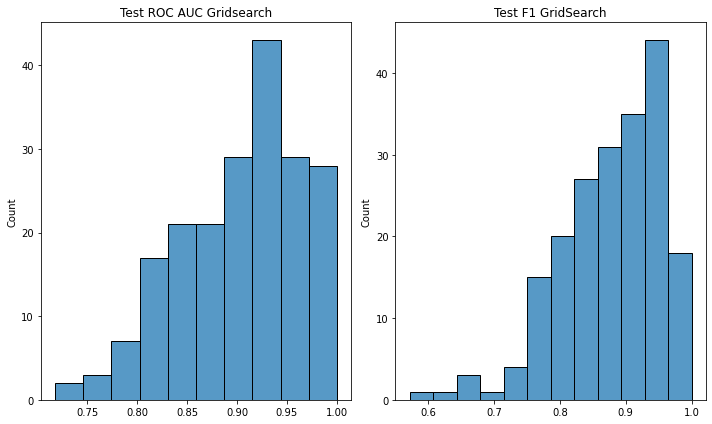

In [ ]:
#HYPERPARAMETER SEARCH DISTRIBUTION MODEL with GridSearch Cross Validation
test_roc = []
test_f1= []
best_f1 = 0

for j in range(200):
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.1)

  search_params = {}


  model = GridSearchCV(naive_bayes.GaussianNB(), search_params, cv = StratifiedKFold(10))

  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  test_roc.append(roc_auc_score(y_test, y_pred))
  test_f1.append(f1_score(y_test, y_pred.round()))

  if(best_f1 < f1_score(y_test, y_pred.round())):
    best_f1 = f1_score(y_test, y_pred.round())
    model = model.best_estimator_

f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].set_title("Test ROC AUC Gridsearch")
axs[1].set_title("Test F1 GridSearch")
sns.histplot(test_roc, ax = axs[0])
sns.histplot(test_f1, ax = axs[1])
f.tight_layout()
print("BEST F1 Gridsearch", best_f1)

I can note that with a test size of 0.1 the distribution works perfectly fine and close to the benchmark score

In [ ]:
y_pred = model.predict(test_data)
output = pd.DataFrame({'id': np.arange(0,285), 'diagnosis': y_pred})
output = output.set_index('id')
output['diagnosis'] = y_pred
output.to_csv("submission.csv")
output

,diagnosis
id,
0,0
1,0
2,0
3,1
4,1
...,...
280,0
281,1
282,0
